In [1]:
# Default code block

# line magic
%pylab inline 

import pandas as pd
import seaborn

%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

Populating the interactive namespace from numpy and matplotlib


# Introduction to Probability

## What is Probability?
- The study of theoretical possibilities and their likelihood of occuring.
- **(Theoretical) Examples:** 
    - What is the chance of flipping three (fair) coins and getting heads twice?
    - What is the chance of a (unbiased) drunk driver getting from point A to point B in NYC?
    - What is the chance that the sum of 17 (fair) die rolls is greater than 100? 

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/BluePlatonicDice2.jpg" width="300">


## Some examples:

### Chance of flipping three (fair) coins and getting (exactly) two heads
- Each coin has probability 1/2 of heads and 1/2 of tails, and all are **independent**.
- Naming the coins as C_1, C_2 and C_3, we see that the probability of two heads is the sum of the probabilities of all possible ways that this can happen:
$$ $$
\begin{eqnarray*}
P(\text{"Exactly Two Heads"}) &=& 
\,\,\,\,\,\,P(C_1 = \text{"H"}) \times P(C_2 = \text{"H"}) \times P(C_3 = \text{"T"}) \\
&&+ P(C_1 = \text{"H"}) \times P(C_2 = \text{"T"}) \times P(C_3 = \text{"H"}) \\
&&+ P(C_1 = \text{"T"}) \times P(C_2 = \text{"H"}) \times P(C_3 = \text{"H"}) \\
&=& 1/8 + 1/8 + 1/8 \\
&=& 3/8
\end{eqnarray*}

<img src="https://upload.wikimedia.org/wikipedia/commons/5/58/Roman_gold_coins_excavated_in_Pudukottai_India_one_coin_of_Caligula_31_41_and_two_coins_of_Nero_54_68.jpg" width="400">
 

### Similarly for numeric values for the outcomes, as for a fair die $D_1$:
\begin{align}
&P(D_1 = 1) = 1/6, 
\qquad
P(D_1 = 2) = 1/6, 
\qquad
P(D_1 = 3) = 1/6, 
\\
&P(D_1 = 4) = 1/6, 
\qquad
P(D_1 = 5) = 1/6, 
\qquad
P(D_1 = 6) = 1/6, 
\qquad
\end{align}

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/6sided_dice.jpg" width="300">

We could also go through and answer the question of the probability that the sum of 17 die rolls is > 100 if we wanted to...

### What's going on?
- **Joint Probability** (Intersections):
    - **Independent** events occur with probability the product of their individual probabilities!
    - I.e., $P(A \text{ and } B) = P(A) \times P(B)$
- Disjoint events (Unions):
    - The probability of either $A$ or $B$ occurring is $P(A) + P(B) - P(A \text{ and } B)$
    - For disjoint events (i.e. both can't occur) this is just the sum $P(A) + P(B)$
    
If you don't believe this -- look at a Venn Diagram!

In [2]:
## Look at a Venn Diagram to see this!

### Dependent variables and Conditional probabilty

#### Not all probabilities are independent -- here's an example:

I am allergic to dogs. (Sad but true.)  They make me sneeze.
Sometimes dogs say hello to me.  What is the probability that I sneeze?

Here I know some probabilities about the friendliness of dogs:
- $P(\text{"Dog greets me"}) = 1/4$ 
- $P(\text{"Dog doesn't greet me"}) = 3/4$ 

Sometimes we know the **conditional probabilities** that depend on whether dogs say hello:
- $P(\text{"I sneeze"} |\, \text{"Dog greets me"}) = 9/10$
- $P(\text{"I don't sneeze"} |\, \text{"Dog greets me"}) = 1/10$
- $P(\text{"I sneeze"} |\, \text{"Dog doesn't greet me"}) = 2/10$
- $P(\text{"I don't sneeze"} |\, \text{"Dog doesn't greet me"}) = 8/10$

How can I find the probability of sneezing in general?
$$ $$
\begin{align}
P(\text{"I sneeze"}) 
&= P(\text{"I sneeze"} |\, \text{"Dog greets me"}) \times P(\text{"Dog greets me"}) 
\\
&= P(\text{"I sneeze"} |\, \text{"Dog doesn't greet me"}) \times P(\text{"Dog doesn't greet me"}) 
\\
&= \frac{9}{10} \times \frac{1}{4} + \frac{2}{10} \times \frac{3}{4}
\\
&= \frac{9 + 6}{40} = \frac{3}{8} = 37.5\%
\end{align}

What does the probability space look like?  **DRAW IT!**

Note that $P(\text{"I sneeze"})$ depends on the value of $\text{"Dog greets me"}$!
  
   **The random variables "I sneeze" and "Dog greets me" are not independent!**
  
If we thought they were independent, we would conclude that the probabilty 
  that I sneeze when a dog greets me is $\frac{1}{4} \cdot \frac{3}{8} = \frac{3}{32} \approx 9.3\%$, 
  but its actually $\frac{1}{4} \cdot \frac{9}{10} = 22.5\%$!


## How does the theory work?

### Basic Setup
- Probability space -- a weighted set giving the possible universes that you live in!
- Events -- Subsets of this probability space describing the universes where your "event" happens!
- Random variables -- a rule to assign a value to each possible universe.

### Rules 
- All event weightings must be non-negative, and must add to one.
- No "funny business" with making events. (Don't worry -- this is hard to do badly.)

### Visualize the probability space and various events for each value of a coin flip:
- Two coins -- Probability space(all joint probabilities) as boxes
- Two coins -- Event: $C_1 = H$
- Two coins -- Event: $C_1 = T$
- Two coins -- Event: $C_2 = H$
- Two coins -- Event: $C_2 = T$
- Two coins -- Event: Both heads
- Two coins -- Event: Both tails
- Two coins -- Event: $C_1 = H$, $C_2$ = Anything
- **Some Random variables:** $C_1$, $C_2$, Concatenate($C_1$, $C_1$, $C_2$), etc.
     
     
- Three coins -- Probability space as boxes    
- Three coins -- Event: $C_1 = H$, $C_2 = C_3 =$ Anything
     
     
- Two Dice -- Probability space
- Two Dice -- Sum of values is 2
- Two Dice -- Sum of values is 3
- Two Dice -- Sum of values is ... through 12
- Two Dice -- Sum of values is >6
- **Some Random Variables:** $D_1$, $D_2$, $D_1+D_2$, $D_1*D_2$, etc.

**NOTE:** Probability Space Pictures are **NOT UNIQUE** -- make your own! =)


In [3]:
## Draw these pictures on the board!

### Random Variables
They assign a value to every possible universe.  These can also be used to define events (as the set of universes where the random variable has a certain set of values).

Examples of Random Variables:
- $C_1$
- $D_1$
- $D_2$
- $D_1 + D_2 + 5(D_3)^2$

Events from Random Variables:
- $D_1 = 5$
- $D_1 + D_2 <=4$
- "Exactly two heads"

**NOTE:** Often theses are taken to be **numeric** random variables, with real number values!


### Visualizing Random Variables (two ways):
- **Probability space (universe-centric)** -- What is the value for each possible universe?
- **Probability densities (value-centric)** -- What is the weighting for each value?



#### Probability Density Pictures:
These can be also easily visualized by a "normalized histogram" which gives the 
values with their appropriate probability weightings:

    Examples:
        Fair Coin: 1/2, 1/2
        Unfair Coin: 1/3, 2/3
        Fair Die: 1/6, 1/6, 1/6, 1/6, 1/6, 1/6
        Unfair Die: 1/20, 2/20, 2/20, 2/20, 2/20, 11/20

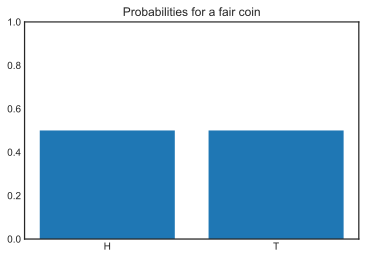

In [4]:
## PROBABILITIES FOR A FAIR COIN
Left = [0,1]
Vals = ['H', 'T']
Probs = [1.0/2, 1.0/2]

## Plot the probabilities
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for a fair coin")

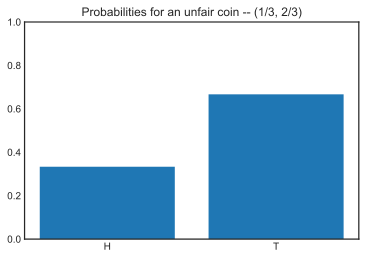

In [5]:
## PROBABILITIES FOR OF AN UNFAIR COIN
Left = [0,1]
Vals = ['H', 'T']
Probs = [1.0/3, 2.0/3]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for an unfair coin -- (1/3, 2/3)")

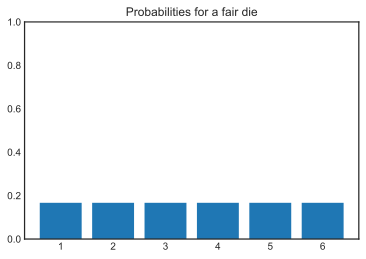

In [6]:
## PROBABILITIES FOR A FAIR DIE
n = 6
Left = range(n)
Vals = range(1,n+1)
Probs = n * [1.0/n]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for a fair die")

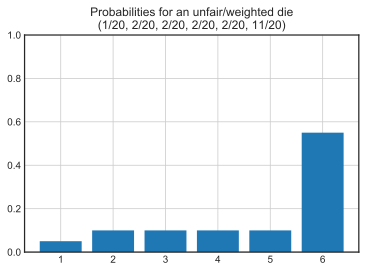

In [7]:
## PROBABILITIES FOR AN UNFAIR FAIR DIE
n = 6
Left = range(n)
Vals = range(1,n+1)
#Probs = n * [1.0/n]
Probs = [1.0/20] + 4*[2.0/20] + [11.0/20]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.grid(True)
H = plt.title("Probabilities for an unfair/weighted die\n(1/20, 2/20, 2/20, 2/20, 2/20, 11/20)")

**Note:** Usually we talk about possibilities as having **numeric** values so we can compute useful numerical quantities to describe random variables.

            

When there are only finitely many values attained by your variable, 
it is called a **discrete random variable**.  (These are always thought 
of as functions on a fixed probability space!)


For these we can compute the following important quantities:
- **Expected value/mean value** 
$$E(X) := \mu_X := \sum_{\text{values $x$ of $X$}} P(X = x) \times x$$
- **Variance** 
\begin{align}
Var(X) &:= (\sigma_X)^2
\\
&:= \sum_{\text{values $x$ of $X$}} P(X = x) \times (x - E(X))^2
\\
&=  E\left((X - E(X))^2\right)
\end{align}
- **Standard Deviation**
$$
\sigma_X := \sqrt{Var(X)}
$$
    
    
For equallly weighted (i.e. fair) discrete random variables with $n$ values this becomes:
- Expected value/mean value 
$$
E(X) := \mu_X := \frac{\sum_{\text{values $x$ of $X$}} x}{n}
$$
- Variance 
$$
Var(X) :=  \frac{\sum_{\text{values $x$ of $X$}} (x - E(X))^2}{n}
$$


### Example: Mean and variance for a fair die 
\begin{align}
    E(X) &= \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = \frac{21}{6} = 3.5 \\
    \\
    Var(X) &= \frac{(1 - 3.5)^2 + \cdots + (6 - 3.5)^2}{6} \approx 2.91666...
    \\
    \sigma_X &= \sqrt{Var(X)} \approx 1.7078...
\end{align}
    
**Note:** We cannot compute the expected value or variance of a fair coin 
        without assigning its values 'H' an 'T' to numbers!

For two discrete random variables on the same probability space, 
we can talk about their **covariance**:
$$ $$
\begin{align}
\text{Cov}&(X,Y) \\
&= \sum_{\substack{\text{values $x$ of $X$}\\ \text{values $y$ of $Y$}}} P(X=x, Y=y) (x - E(X))(y - E(Y))
\end{align}
For equal-weighted independent random variables (say with $n$ values each), this reduces to 
$$ $$
    $$\text{Cov}(X,Y) = \frac{\sum_{x,y} (x - E(X))(y - E(Y))}{n^2}$$
If we take X = Y then 
$$ $$
\begin{align}
\text{Cov}(X,X) &= \frac{\sum_{x} \sum_{x}(x - E(X))(x - E(X))}{n^2} \\
             &= \frac{n \times \sum_{x} (x - E(X))(x - E(X))}{n^2} \\
             &= \frac{\sum_{x} (x - E(X))^2}{n} \\
             &= \text{Var}(X)
\end{align}

## An important Probability theorem:

**Law of Large Numbers (LLN informal)** -- The average value of a large number of independent 
samples of a random variable $X$ gets arbitrarily close to its expected value $E(X)$.

**Law of Large Numbers (LLN formal)** -- Suppose that $X_1, ..., X_n$ are independent random 
variables with the same probability densities as the random variable $X$, then 

$$
\lim_{n \rightarrow \infty} \frac{X_1 + X_2 + \cdots + X_n}{n} = E(X).
$$



In [56]:
## PROBABILITIES FOR A FAIR DIE
def make_die(d=6):
    # dict comprehensions: 
    # RV = {val: 1./6 for val in range(1, d+1)}
    
    RV = {}
    for val in range(1, d+1):
        RV[val] = 1.0/6    
    return RV


def make_sum_of_two_variables(V1, V2):
    """
    RV = ([val_list], [prob_list])    
    """
    new_V = {}
    for v1 in V1:
        for v2 in V2:            
            new_V[v1 + v2] = new_V.get(v1 + v2, 0) + V1[v1] * V2[v2]

    ## Adjust for roundoff error -- Rescale the probabilities to sum to one
    inv_prob_sum = 1.0 / sum(list(new_V.values()))
    for k in new_V:
        new_V[k] *= inv_prob_sum 
        
    return new_V
            

def RV_mean(V):
    """
    Return the mean of the random variable.    
    """
    # return sum(val*prob for val, prob in V.iteritems())
    mean = 0.0
    for val, prob in V.items():
        mean += prob * val
    return mean

    
def RV_histogram(V, n):
    
    Vals = list(V.keys())
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Left, Probs, align='center', width = 1.0)
    H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_histogram__dots(V, n):
    
    Vals = list(V.keys())
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.plot(Left, Probs, 'bo')
    H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    x_min, x_max = plt.xlim()  
    eps = 0.5
    H = plt.xlim([x_min - eps, x_max + eps])
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_mean_scaled_histogram(V, n, use_unscaled_xticks=True):
    
    mean = RV_mean(V)

    Vals = V.keys()
    Scaled_Vals = [1.0 * v / n   for v in V.keys()]
    Probs = [n*V[val] for val in Vals]
    max_prob = max(Probs + [1])
    d = len(Vals)
    Left = Vals
    Scaled_Left = Scaled_Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Scaled_Left, Probs, align='center', width=1.0/n)
    if not use_unscaled_xticks:
        H = plt.xticks(Scaled_Left, Scaled_Vals)
    H = plt.ylim((0,max_prob))
    if n == 1:
        H = plt.title("Scaled Probabilities for one fair die")
    else:
        H = plt.title("Scaled Probabilities for the sum of " + str(n) + " fair dice")

In [38]:
## Let's do an example -- rolling many dice!
D_list = [make_die()]
for i in range(10):
    D_list.append(make_sum_of_two_variables(D_list[-1], D_list[-1]))

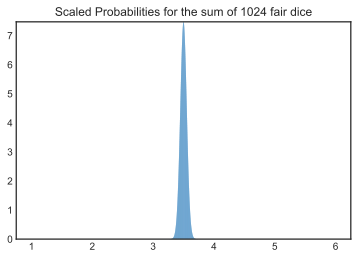

In [39]:
## Try varying 0 <= k <= 10
k = 10
RV_mean_scaled_histogram(D_list[k],n = 2**k)

#### Miscellaneous Calculations

In [40]:
## Compute variance of fair die
var = sum([(v - 3.5)**2 for v in range(1,7)])/6.0; var

2.9166666666666665

In [41]:
## Compute the standard deviation of a fair die
from math import sqrt
sqrt(var)

1.707825127659933

### Compute the probabilities for a sum of n coins

In [43]:
D_list = [make_die()]
for i in range(9):
    D_list.append(make_sum_of_two_variables(D_list[-1], D_list[-1]))

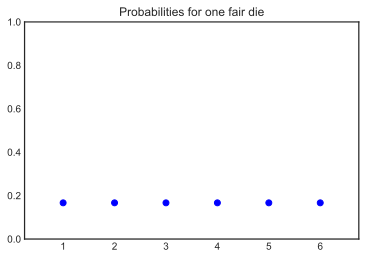

In [44]:
k = 0
RV_histogram__dots(D_list[k],n = 2**k)


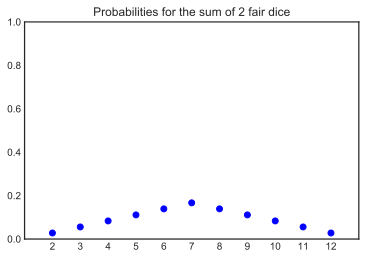

In [57]:
k = 1
RV_histogram__dots(D_list[k],n = 2**k)

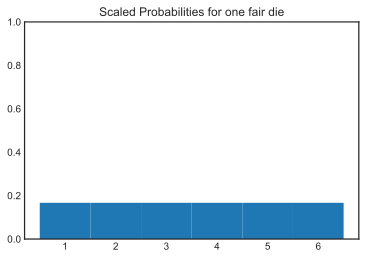

In [47]:
k = 0
RV_mean_scaled_histogram(D_list[k],n = 2**k)

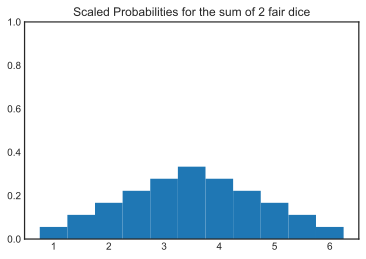

In [48]:
k = 1
RV_mean_scaled_histogram(D_list[k],n = 2**k)

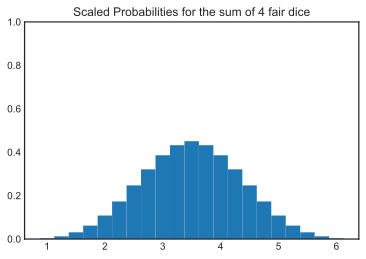

In [49]:
k = 2
RV_mean_scaled_histogram(D_list[k],n = 2**k)

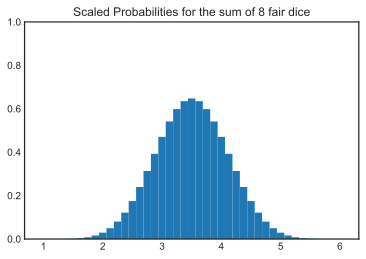

In [50]:
k = 3
RV_mean_scaled_histogram(D_list[k],n = 2**k)

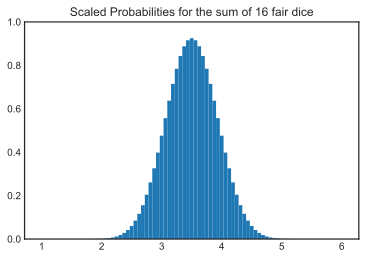

In [51]:
k = 4
RV_mean_scaled_histogram(D_list[k],n = 2**k)

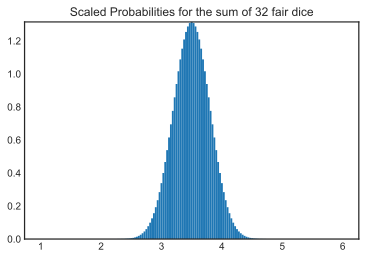

In [52]:
k = 5
RV_mean_scaled_histogram(D_list[k],n = 2**k)

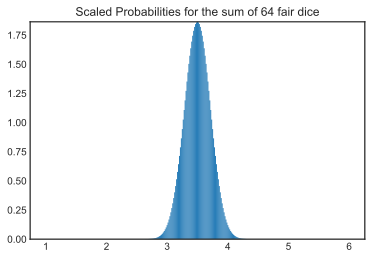

In [53]:
k = 6
RV_mean_scaled_histogram(D_list[k],n = 2**k)

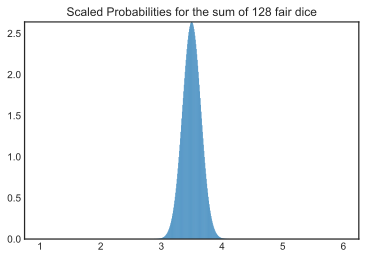

In [54]:
k = 7
RV_mean_scaled_histogram(D_list[k],n = 2**k)

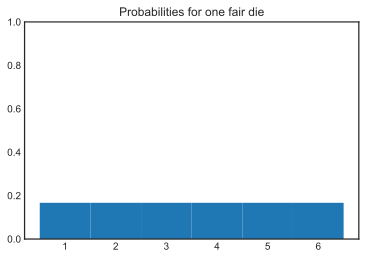

In [58]:
RV_histogram(D_list[0], n=1)

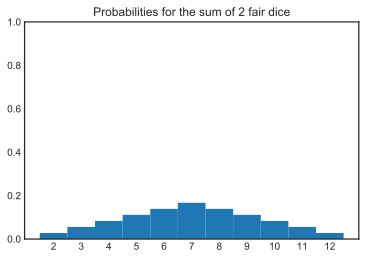

In [59]:
RV_histogram(D_list[1], n=2)